# Algorytmy macierzowe
## lab 1

In [33]:
import numpy as np
from time import time
from matplotlib import pyplot as plt

Generowanie macierzy

In [34]:
def random_matrix(matrix_size, min_val, max_val):
    """Return matrix with random floats from [min_val, max_val)"""
    return (max_val - min_val) * np.random.random(matrix_size) + min_val

In [141]:
exp = 8
matrix_size = (exp, exp)

min_val = 0.00000001
max_val = 1

A = random_matrix(matrix_size, min_val, max_val)
B = random_matrix(matrix_size, min_val, max_val)

Standardowe mnożenie macierzy

In [142]:
def standard_mlt(A, B):
    """Return tuple with mlt result and no_operations"""
    operation_count = 0
    plus_count = 0
    mult_count = 0
    result = np.zeros((len(A), len(B[0])), dtype=float)
    for i in range(len(A)):
        for j in range(len(B[0])):
               for k in range(len(B)):
                    result[i][j] += A[i][k] * B[k][j]
                    plus_count += 1
                    mult_count += 1
                    operation_count += 2
    return result, operation_count, plus_count, mult_count

### 1. Rekurencyjne mnożenie macierzy metodą Binet`a (10 punktów)

In [143]:
def binet_mlt(A, B):
    global operation_count, plus_count, mult_count
    
    if len(A) != len(B):
        print("ERROR: Wrong matrix dimensions!")
    elif len(A) == 2:
        a00 = A[0,0]*B[0,0] + A[0,1]*B[1,0]
        a01 = A[0,0]*B[0,1] + A[0,1]*B[1,1]
        
        a10 = A[1,0]*B[0,0] + A[1,1]*B[1,0]
        a11 = A[1,0]*B[0,1] + A[1,1]*B[1,1]
        
        plus_count += 4
        mult_count+= 8
        operation_count += 12
        return np.array([[a00,a01],
                         [a10,a11]])
    else:
        matrix_size = len(A)
        
        A11 = A[:matrix_size//2, :matrix_size//2]
        A12 = A[:matrix_size//2, matrix_size//2:]
        A21 = A[matrix_size//2:, :matrix_size//2]
        A22 = A[matrix_size//2:, matrix_size//2:]

        B11 = B[:matrix_size//2, :matrix_size//2]
        B12 = B[:matrix_size//2, matrix_size//2:]
        B21 = B[matrix_size//2:, :matrix_size//2]
        B22 = B[matrix_size//2:, matrix_size//2:]
        
        C11 = binet_mlt(A11, B11) + binet_mlt(A12, B21)
        C12 = binet_mlt(A11, B12) + binet_mlt(A12, B22)
        C21 = binet_mlt(A21, B11) + binet_mlt(A22, B21)
        C22 = binet_mlt(A21, B12) + binet_mlt(A22, B22)
        plus_count += 4*(len(C11)**2)
        
        operation_count += plus_count
        
        result = np.empty((matrix_size, matrix_size))
        result[:matrix_size // 2, :matrix_size // 2] = C11
        result[:matrix_size // 2, matrix_size // 2:] = C12
        result[matrix_size // 2:, :matrix_size // 2] = C21
        result[matrix_size // 2:, matrix_size // 2:] = C22
        
        return result

In [144]:
operation_count = 0
plus_count = 0
mult_count = 0
res = binet_mlt(A, B)

print(f"Matrix size: 2**{exp}")
print("Is correct?:", np.allclose(res, A@B))
print("Number of operations:", operation_count, plus_count, mult_count)
print("Number of operations (Standard mlt):", standard_mlt(A, B)[1])
# print("Result:", res, sep='\n')

Matrix size: 2**8
Is correct?: True
Number of operations: 2944 448 512
Number of operations (Standard mlt): 1024


### 2. Rekurencyjne mnożenie macierzy metodą Strassena (10 punktów)

In [153]:
def strassen_mlt(A,B):
    global operation_count, plus_count, mult_count

    n = len(A)
    
    if(n==2):
        A11 = A[0,0]
        B11 = B[0,0]

        A12 = A[0,1]
        B12 = B[0,1]

        A21 = A[1,0]
        B21 = B[1,0]

        A22 = A[1,1]
        B22 = B[1,1]
        
        P1 = (A11 + A22)*(B11 + B22)
        P2 = (A21 + A22)*B11
        P3 = A11*(B12 - B22)
        P4 = A22*(B21 - B11)
        P5 = (A11 + A12)*B22
        P6 = (A21 - A11)*(B11 + B12)
        P7 = (A12 - A22)*(B21 + B22)
        
        C11 = (P1 + P4 - P5 + P7)
        C12 = (P3 + P5)
        C21 = (P2 + P4)
        C22 = (P1 - P2 + P3 + P6)
        result = np.empty((n, n))
        result[:n // 2, :n // 2] = C11
        result[:n // 2, n // 2:] = C12
        result[n // 2:, :n // 2] = C21
        result[n // 2:, n // 2:] = C22
        
        plus_count += 18
        mult_count += 7
        
        return result
        
    A11 = A[:n//2, :n//2]
    B11 = B[:n//2, :n//2]

    A12 = A[:n//2, (n//2):]
    B12 = B[:n//2, (n//2):]

    A21 = A[(n//2): , :n//2]
    B21 = B[(n//2): , :n//2]

    A22 = A[(n//2): , (n//2):]
    B22 = B[(n//2): , (n//2):]
    

    P1 = strassen_mlt((A11 + A22), (B11 + B22))
    P2 = strassen_mlt((A21 + A22), B11)
    P3 = strassen_mlt(A11, (B12 - B22))
    P4 = strassen_mlt(A22, (B21 - B11))
    P5 = strassen_mlt((A11 + A12), B22)
    P6 = strassen_mlt((A21 - A11), (B11 + B12))
    P7 = strassen_mlt((A12 - A22), (B21 + B22))
    
    C11 = (P1 + P4 - P5 + P7)
    C12 = (P3 + P5)
    C21 = (P2 + P4)
    C22 = (P1 - P2 + P3 + P6)
    
    plus_count += 18 * len(P1)**2
    operation_count += 18 * len(P1)**2
    
    '''top_row = np.hstack((C11, C12))
    bottom_row = np.hstack((C21, C22))
    result = np.vstack((top_row, bottom_row))'''

    result = np.empty((n, n))
    result[:n // 2, :n // 2] = C11
    result[:n // 2, n // 2:] = C12
    result[n // 2:, :n // 2] = C21
    result[n // 2:, n // 2:] = C22
    
    return result

In [154]:
operation_count = 0
plus_count = 0
mult_count = 0
res = strassen_mlt(A, B)

print(f"Matrix size: 2**{exp}")
print("Is correct?:", np.allclose(res, A@B))
print("Number of operations:", operation_count, mult_count, plus_count)
print("Number of operations (Standard mlt):", standard_mlt(A, B)[1])
# print("Result:", res, sep='\n')

Matrix size: 2**8
Is correct?: True
Number of operations: 792 343 1674
Number of operations (Standard mlt): 1024


### 3. Mnożenie macierzy metodą znalezioną przez sztuczną inteligencję (10 punktów)

In [127]:
filename = "factorizations_r.npz"
with open(filename, 'rb') as f:
    factorizations = dict(np.load(f, allow_pickle=True))

In [128]:
for key in factorizations:
    u, v, w = factorizations[key]
    rank = u.shape[-1]
    assert rank == v.shape[-1] and rank == w.shape[-1]
    print(f'{key}: rank={u.shape[-1]}')

2,2,2: rank=7
2,2,3: rank=11
2,2,4: rank=14
2,2,5: rank=18
2,2,6: rank=21
2,2,7: rank=25
2,2,8: rank=28
2,3,3: rank=15
2,3,4: rank=20
2,3,5: rank=25
2,4,4: rank=26
2,4,5: rank=33
2,5,5: rank=40
3,3,3: rank=23
3,3,4: rank=29
3,3,5: rank=36
3,4,4: rank=38
3,4,5: rank=47
3,4,11: rank=103
3,5,5: rank=58
3,5,9: rank=105
3,9,11: rank=225
4,4,4: rank=49
4,4,5: rank=63
4,5,5: rank=76
4,5,9: rank=139
4,5,10: rank=152
4,5,11: rank=169
4,9,10: rank=255
4,9,11: rank=280
4,11,11: rank=343
4,11,12: rank=366
5,5,5: rank=98
5,5,7: rank=134
5,7,9: rank=234
5,7,10: rank=257
5,7,11: rank=280
5,8,9: rank=262
5,8,10: rank=287
5,8,11: rank=317
5,9,9: rank=296
5,9,10: rank=323
5,9,11: rank=358
5,9,12: rank=381
6,7,9: rank=270
6,7,10: rank=296
6,7,11: rank=322
6,8,10: rank=329
6,8,11: rank=365
6,9,9: rank=342
6,9,10: rank=373
6,9,11: rank=411
7,7,9: rank=318
7,7,10: rank=350
7,7,11: rank=384
7,8,9: rank=354
7,8,10: rank=393
7,8,11: rank=432
7,8,12: rank=462
7,9,9: rank=399
7,9,10: rank=441
7,9,11: rank=481
7,

In [129]:
print(factorizations['4,5,5'][2][0])

[ 0  0  0 -1 -1 -1  0  0 -1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  1
  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


![Example](https://www.furidamu.org/images/2022-10-04-alphatensor/strassen.webp)

In [130]:
# (4x5)*(5x5)=(4x5)
# https://www.nature.com/articles/s41586-022-05172-4

#naprawione ale nie wiem czego to dziala
def ai_mlt(A,B, factor):
    '''
    do mnożenia macierzy (4^n x 5^n)*(5^n x 5^n)
    factor[0] - do macierzy A
    factor[1] - do macierzy B
    factor[2] - do macierzy C
    
    factor[0] i factor[1] - macierze o rozmiarze (n*m)x(ilość mnożeń), każda kolumna oznacza które elementy
    i z jakim współczynnikiem biorę do którejś z sum w danym mnożeniu (sum_A)*(sum_B) = m_i, wiersz o danym numerze
    odpowiada w macierzy A lub B elementowi który miałby ten sam indeks po zlinearyzowaniu macierzy
    
    factor[2] - (n*m)x(ilość mnożeń), podobnie jak wyżej ale tutaj wiersze oznaczają które z wcześniej policzonych wyników 
    mnożeń składają się na wynik w danym fragmencie macierzy.
    
    Na obrazku wyżej fajnie widać jak to mniej więcej działa, u= factor[0], v = factor[1] i w = factor[2]

    '''
    global operation_count, plus_count, mult_count
    if A.shape == (4,5) and B.shape == (5,5):
        result = np.zeros((4,5), dtype=float)
        for i in range(len(A)):
            for j in range(len(B[0])):
                   for k in range(len(B)):
                        result[i][j] += A[i][k] * B[k][j]
                        #plus_count += 1
                        #mult_count += 1
        
        mult_count += 76
        plus_count += 539 #teoretycznie tyle by zajelo gdyby przepisac to wszystko z dolu i zamienic mnozenia
        #macierzy na zwykle
        return result

    
    
    
    n = len(A)//4
    m = len(A[0])//5
    k = len(B[0])//5
    
    
    t1 = factor[0]
    t2 = factor[1]
    t3 = factor[2]
    
    mul_len = t1.shape[1]
    
    mtab = [None for _ in range(mul_len)]
    for i in range(mul_len):
        A_elements = t1[:, i]
        B_elements = t2[:, i]
        
        A_factor = np.zeros((n,m), dtype = float)
        for j in range(len(A_elements)):
            if A_elements[j] != 0:
                x,y = np.unravel_index(j, (4,5))
                A_factor += A[x*n:(x+1)*n, y*m: (y+1)*m]*A_elements[j]
                
                plus_count += len(A_factor[0])*len(A_factor)
                operation_count += len(A_factor)*len(A_factor[0])
        
        B_factor = np.zeros((k,k), dtype = float)
        for j in range(len(B_elements)):
            if B_elements[j] != 0:
                x,y = np.unravel_index(j, (5,5))
                B_factor += B[x*k:(x+1)*k, y*k: (y+1)*k]*B_elements[j]
                
                plus_count += len(B_factor)**2
                operation_count += len(B_factor)**2
        
        m_res = ai_mlt(A_factor, B_factor, factor)
        #operation_count += 1
        mtab[i] = m_res
    
    #temp_res = A@B
    res_matrix = np.zeros((n*4,m*5), dtype = float)
    
    xind = 0
    yind = 0
    for i in range(t3.shape[0]):
        x,y = np.unravel_index(i, (4,5))
        res_fragment = np.zeros((n,m), dtype = float)
        C_elements = t3[i, :]
        for j in range(len(C_elements)):
            if C_elements[j] != 0:
                res_fragment += mtab[j]*C_elements[j]
                
                plus_count += n*m
        
        if xind >= 4:  
            yind+=1
            xind=0
        
        res_matrix[xind*n:(xind+1)*n, yind*m: (yind+1)*m] = res_fragment
        
        xind+=1
        
    return res_matrix
        
        
            
        
        

In [131]:
a1 = random_matrix((4**3,5**3), 0, 1)
a2 = random_matrix((5**3,5**3), 0, 1)
operation_count = 0
plus_count = 0
mult_count = 0

r1 = ai_mlt(a1, a2, factorizations['4,5,5'])
r2, op, p, m = standard_mlt(a1,a2)
print(operation_count, op, operation_count - op, plus_count,p,m, mult_count)
print(mult_count, m)
print(plus_count, p)
print(a1.shape, a2.shape)

1163670 2000000 -836330 4660934 1000000 1000000 438976
438976 1000000
4660934 1000000
(64, 125) (125, 125)


In [132]:
print(r1)

[[29.1727544  31.45372158 28.61819642 ... 32.59807117 28.0514108
  31.58562385]
 [27.74330861 32.13247863 27.27617025 ... 29.43160426 27.40527411
  30.79677165]
 [31.82649577 34.38894599 30.8337526  ... 33.58170941 32.65786846
  37.71825489]
 ...
 [28.80852631 32.64247419 26.42997603 ... 28.99615376 27.19061016
  32.13459779]
 [28.33324164 31.04807281 29.15001145 ... 29.21628381 29.32838384
  31.48105832]
 [31.35663033 33.63898664 30.82368702 ... 33.13577695 31.85212487
  36.10049897]]


In [133]:
print((a1@a2))

[[29.1727544  31.45372158 28.61819642 ... 32.59807117 28.0514108
  31.58562385]
 [27.74330861 32.13247863 27.27617025 ... 29.43160426 27.40527411
  30.79677165]
 [31.82649577 34.38894599 30.8337526  ... 33.58170941 32.65786846
  37.71825489]
 ...
 [28.80852631 32.64247419 26.42997603 ... 28.99615376 27.19061016
  32.13459779]
 [28.33324164 31.04807281 29.15001145 ... 29.21628381 29.32838384
  31.48105832]
 [31.35663033 33.63898664 30.82368702 ... 33.13577695 31.85212487
  36.10049897]]


In [134]:
def exists(a, b, block):
    for x in range(4):
        for y in range(5):
            mb = b[x*n:(x+1)*n, y*m: (y+1)*m]
            if np.allclose(mb, block):
                return True, x, y
            
r2 = a1@a2

n = 4
m = 5

for x in range(4):
    for y in range(5):
        mb = r2[x*n:(x+1)*n, y*m: (y+1)*m]
        ma = r1[x*n:(x+1)*n, y*m: (y+1)*m]
        print(ma)
        print("------")
        print(mb)
        print(np.allclose(ma, mb), x, y)
        if not np.allclose(ma, mb):
            print(exists(r1, r2, ma))
        print("\n\n")

[[29.1727544  31.45372158 28.61819642 29.53394505 30.95534819]
 [27.74330861 32.13247863 27.27617025 29.22676444 31.50990406]
 [31.82649577 34.38894599 30.8337526  33.41724337 34.92956274]
 [29.05598904 28.95961195 26.80334855 29.49845809 29.60212936]]
------
[[29.1727544  31.45372158 28.61819642 29.53394505 30.95534819]
 [27.74330861 32.13247863 27.27617025 29.22676444 31.50990406]
 [31.82649577 34.38894599 30.8337526  33.41724337 34.92956274]
 [29.05598904 28.95961195 26.80334855 29.49845809 29.60212936]]
True 0 0



[[28.221166   30.81744609 35.00206652 28.35388553 30.99471682]
 [28.92536427 30.12836289 33.67319396 27.71498254 30.17802729]
 [31.80712695 34.47044487 36.00039104 30.85707478 35.1322883 ]
 [27.64310494 30.00680459 32.03757567 27.5501839  32.88063307]]
------
[[28.221166   30.81744609 35.00206652 28.35388553 30.99471682]
 [28.92536427 30.12836289 33.67319396 27.71498254 30.17802729]
 [31.80712695 34.47044487 36.00039104 30.85707478 35.1322883 ]
 [27.64310494 30.00680459 

In [17]:
print(np.allclose(r1,r2))

True


### Testy

In [275]:
exponents = [2**i for i in range(1,10)]

In [276]:
res_times = []
res_operations = []

for exp in exponents:
    A = random_matrix((exp, exp), min_val, max_val)
    B = random_matrix((exp, exp), min_val, max_val)
    
    t_start = time()
    std_op = standard_mlt(A, B)[1]
    std_time = time() - t_start
    
    operation_count = 0
    t_start = time()
    binet_mlt(A, B)
    bin_time = time() - t_start
    bin_op = operation_count
    
    operation_count = 0
    t_start = time()
    strassen_mlt(A, B)
    str_time = time() - t_start
    str_op = operation_count
    
    res_times.append((std_time, bin_time, str_time))
    res_operations.append((std_op, bin_op, str_op))

In [24]:
e = 4
ai_sizes_a = [(4**n, 5**n) for n in range(1,e)]
ai_sizes_b = [(5**n, 5**n) for n in range(1,e)]
sizes = list(zip(ai_sizes_a, ai_sizes_b))

print(sizes)
ai_times = []
ai_op = []

for size in sizes:
    A = random_matrix(size[0], 0, 1)
    B = random_matrix(size[1], 0, 1)
    
    operation_count = 0
    st = time()
    r = ai_mlt(A,B, factorizations['4,5,5'])
    en = time()
    
    
    stdt = time()
    r1, op = standard_mlt(A,B)
    stde = time()
    
    ai_times.append((en-st, stde-stdt))
    ai_op.append((operation_count, op))


[((4, 5), (5, 5)), ((16, 25), (25, 25)), ((64, 125), (125, 125))]


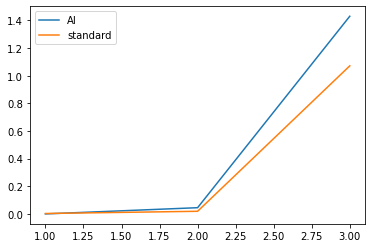

In [25]:
nnn= 3
plt.plot(range(1,e)[:nnn], ai_times[:nnn])
plt.legend(("AI", "standard"))
plt.show()

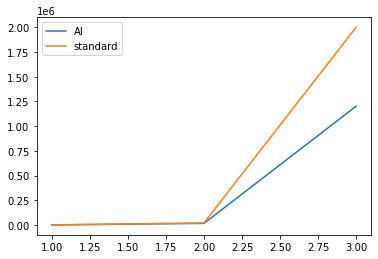

In [26]:
plt.plot(range(1,e), ai_op)
plt.legend(("AI", "standard"))
plt.show()

Wykresy

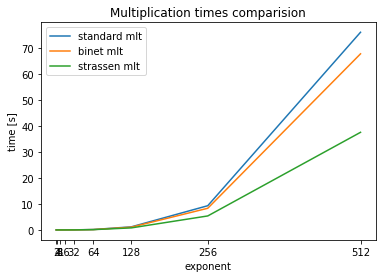

In [277]:
plt.plot(exponents, res_times)
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents)
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times256")
plt.show()

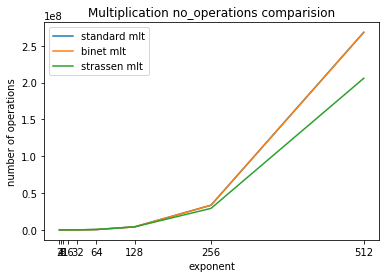

In [278]:
plt.plot(exponents, res_operations)
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents)
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations256")
plt.show()

Wykresy dla małej liczby elementów

In [279]:
no_elements = 4

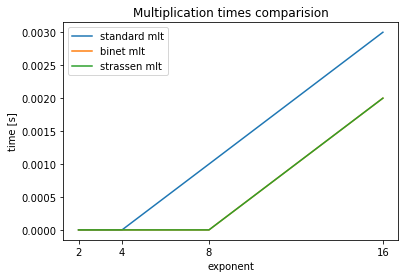

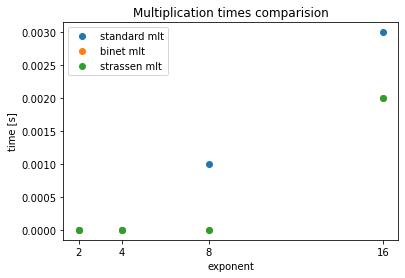

In [280]:
plt.plot(exponents[:no_elements], res_times[:no_elements])
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times16")
plt.show()

plt.plot(exponents[:no_elements], res_times[:no_elements], 'o')
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times16_o")
plt.show()

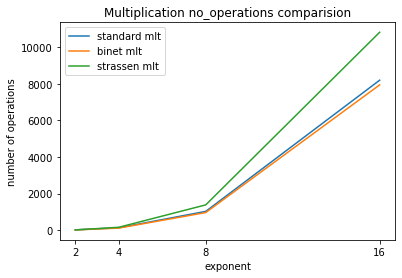

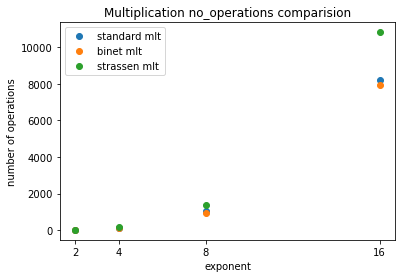

In [281]:
plt.plot(exponents[:no_elements], res_operations[:no_elements])
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations16")
plt.show()

plt.plot(exponents[:no_elements], res_operations[:no_elements], 'o')
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations16_o")
plt.show()